The whole point of this project is to do handwriting recognition of digits 0-9. I am using the data set that was provided by the university of Edinburgh (and the code which allows me to extract the dataset). The dataset consists of 41971 data points of numbers consisting of digits from 0-9, each digit has 784 features which represent the pixel value. (This project is an extension of a coursework that was provided). Ytrain would be the corresponding digit value for the corresponding feature vector. 

In [4]:
# import numpy as np
import matplotlib.pyplot as plt
import numpy as np

###########
def rd_mnist_labels(fname):
	fid = open(fname, 'r')
	header = np.fromfile(fid, count=2, dtype='>i')
	labels = np.fromfile(fid, dtype='uint8')
	fid.close()
	return labels, header


def rd_mnist_images(fname):
	fid = open(fname, 'r')
	header = np.fromfile(fid, count=4, dtype='>i')
	n_images = header[1]
	height = header[2]
	width = header[3]
	bsize = height * width
	images = np.fromfile(fid, dtype='uint8')
	images = np.reshape(images, (n_images, bsize))
	fid.close()
	return images, header

def load_my_data_set(dir):
	Xtrn, _ = rd_mnist_images(dir+'/trn-images-idx3-ubyte')
	Ytrn, _ = rd_mnist_labels(dir+'/trn-labels-idx1-ubyte')
	Xtst, _ = rd_mnist_images(dir+'/tst-images-idx3-ubyte')
	Ytst, _ = rd_mnist_labels(dir+'/tst-labels-idx1-ubyte')

	return Xtrn, Ytrn, Xtst, Ytst

#### code provided by University of Edinburgh  - the data set was 
### provided by them and so was the code to read the data set

dset_dir = '/Users/andy/Desktop/HandwritingData/'
Xtrn, Ytrn, Xtst, Ytst = load_my_data_set(dset_dir)
Xtrn = Xtrn/255.0
#Ytrn = Ytrn/255.0
Xtst = Xtst/255.0



print("Xtrain dimensions")
print(np.shape(Xtrn))

print("Ytrain dimensions")
print(np.shape(Ytrn))


Xtrain dimensions
(41971, 784)
Ytrain dimensions
(41971,)


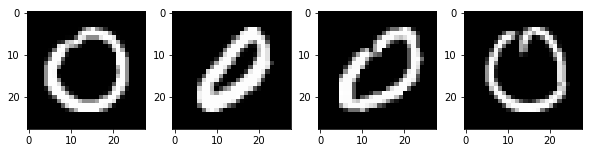

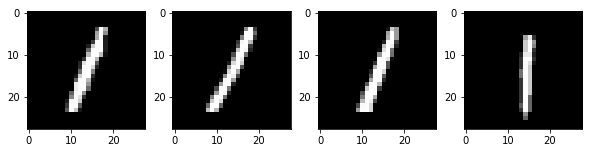

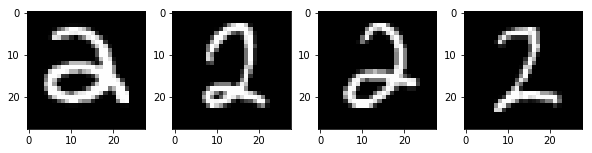

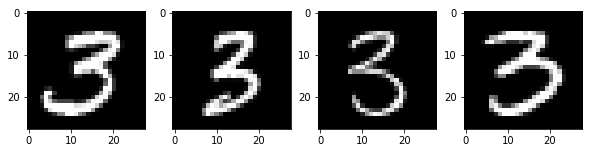

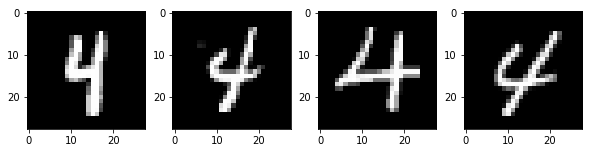

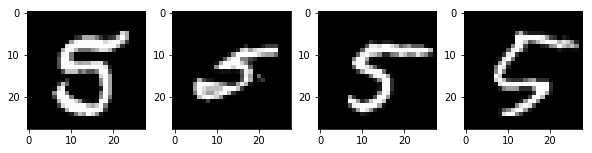

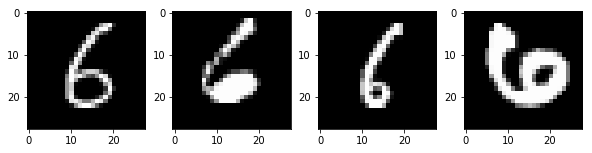

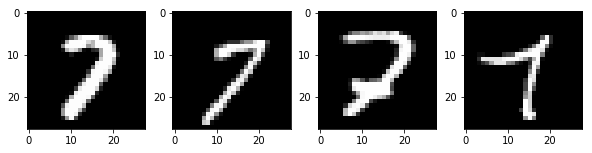

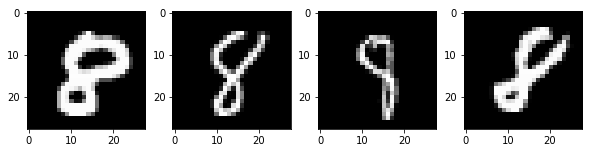

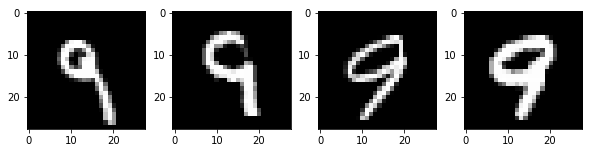

In [2]:
### The whole point of this method is to be able to display the first four
### pictures of the digits that come up in the ytrn (just to give an
### inidication of what are the digists I am working with)
def display_firstfour(X, Y):
    x = 0
    while(x<10):
        fig=plt.figure(figsize=(10, 10))
        y=0
        while(y<4):
            classish = np.where(Y==x)[0]
            samplex = X[classish[y]]
            fig.add_subplot(4,4,y+1)
            plt.imshow(np.reshape(samplex, (28, 28)), cmap='gray')
            y+=1
            #plt.pause(0.05)
        plt.show()
        plt.pause(0.05)
        x+=1
display_firstfour(Xtrn, Ytrn)

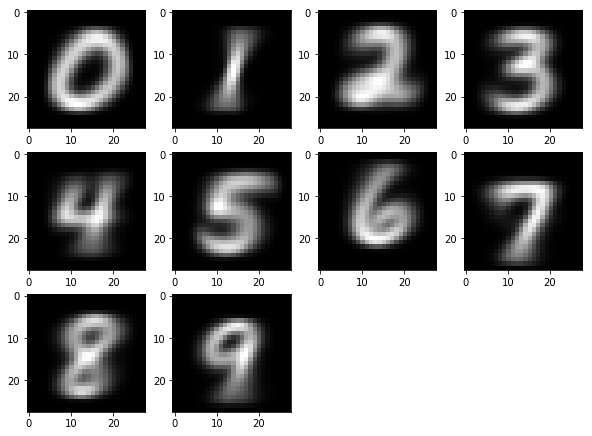

In [3]:
## the whole idea of this method is to show the mean image of each digit 
def Meanclass(X, Y):
    M = []
    for x in range(10):
        classish = np.where(Y==x)[0]
        arrays = []
        for i in range(len(classish)):
            arrays.append(X[classish[i]])
        arrays = np.array(arrays)
        average = np.sum(arrays, axis =0)/len(arrays)
        M.append(average)
    fig=plt.figure(figsize=(10, 10))
    y=0
    while(y<10):
        samplex = M[y]
        fig.add_subplot(4,4,y+1)
        plt.imshow(np.reshape(samplex, (28, 28)), cmap='gray')
        y+=1
        #plt.pause(0.05)
    plt.show()
    plt.pause(0.05)
    return M
M = Meanclass(Xtrn, Ytrn)

In [14]:
""" 
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(Xtrn[0:100], Ytrn[0:100]) 
"""

" \nfrom sklearn import svm\nclf = svm.SVC(kernel='rbf')\nclf.fit(Xtrn[0:100], Ytrn[0:100]) \n"

In [49]:
def accuracy(actual, predicted):
    if(len(actual) == len(predicted)):
        summing = 0
        for x in range(len(actual)):
            if actual[x] == predicted[x]:
                summing+=1
        return summing/len(actual)
    else:
        return "There is a problem with the inputs"

def translationofindices(array):
    a = []
    for x in range(len(array)):
        a.append(array[x][0])
    return a
#translationofindices(indices)

def arraytranslation(predictions, i, properi):
    #predictions = predictions.tolist()
    #i = i.tolist()
    #properi = properi.tolist()
    for x in range(len(predictions)):
        predictions[x] = properi[predictions[x]]
    return predictions

In [50]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
def kclustering(meanclustercenters,initalcenters, Xtrain,Xtest, Ytrain, Ytest):
    print("The inital cluster centers")
    fig=plt.figure(figsize=(10, 10))
    for x in range(10):
        samplex = initalcenters[x]
        fig.add_subplot(4,4,x+1)
        plt.imshow(np.reshape(samplex, (28, 28)), cmap='gray')
    plt.show()
    kmeans = KMeans(n_clusters=10, init = initalcenters, max_iter = 500).fit(Xtrain)
    print("Final cluster centers")
    fig=plt.figure(figsize=(10, 10))
    for x in range(10):
        samplex = kmeans.cluster_centers_[x]
        fig.add_subplot(4,4,x+1)
        plt.imshow(np.reshape(samplex, (28, 28)), cmap='gray')
    plt.show()
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(meanclustercenters)
    distances, indices = nbrs.kneighbors(kmeans.cluster_centers_)
    properindices = translationofindices(indices)
    predictions = kmeans.predict(Xtest)
    actualpredictions = arraytranslation(predictions, indices, properindices)
    print(accuracy(Ytest, actualpredictions))
    
    return kmeans.cluster_centers_
    



The inital cluster centers


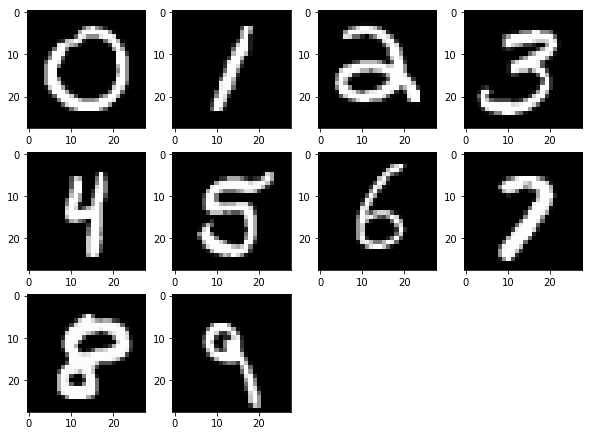

/usr/lib64/python3.4/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Final cluster centers


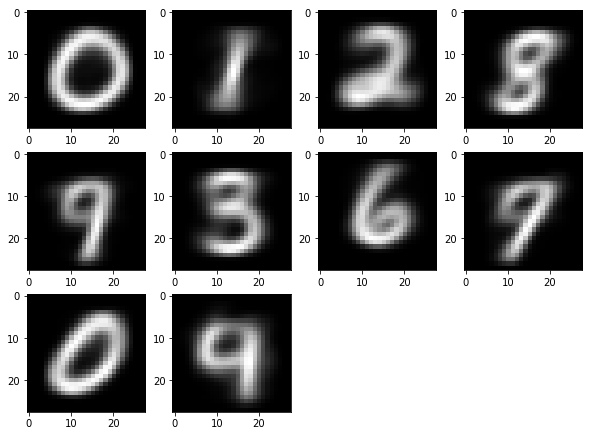

0.5936084549572219


In [51]:
#firstoneofeachclass
X = []
for x in range(10):
    classish = np.where(Ytrn==x)[0]
    samplex = Xtrn[classish[0]]
    X.append(Xtrn[classish[0]])
X = np.array(X)
centersfirstone = kclustering(M,X,Xtrn,Xtst,Ytrn, Ytst)

The inital cluster centers


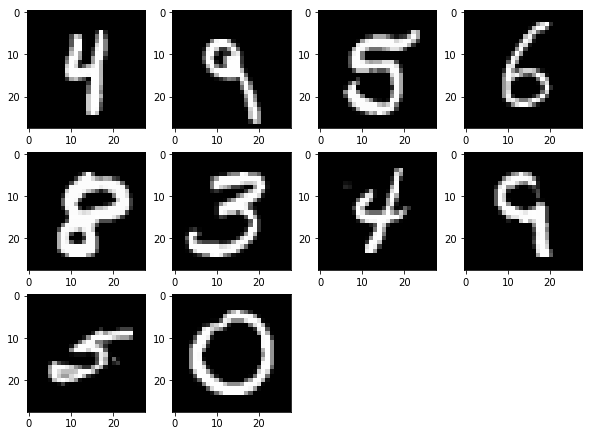

/usr/lib64/python3.4/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Final cluster centers


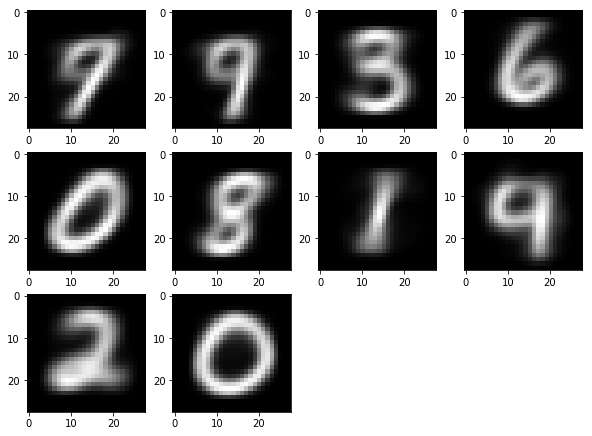

0.5938600905888274


In [52]:
#first10classes
X = []
for x in range(10):
    X.append(Xtrn[x])
X = np.array(X)
#np.shape(X)
centersfirst10 = kclustering(M,X,Xtrn,Xtst,Ytrn, Ytst)


The inital cluster centers


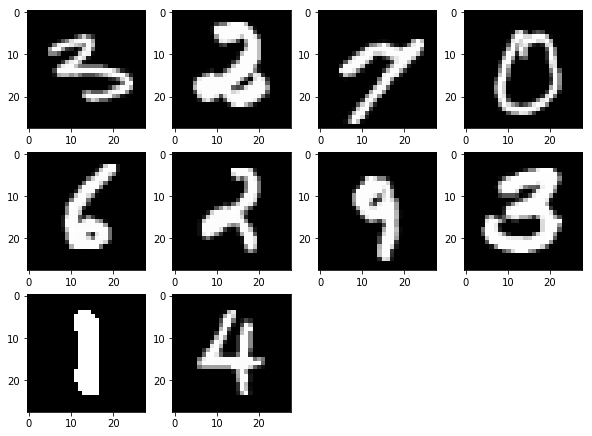

/usr/lib64/python3.4/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Final cluster centers


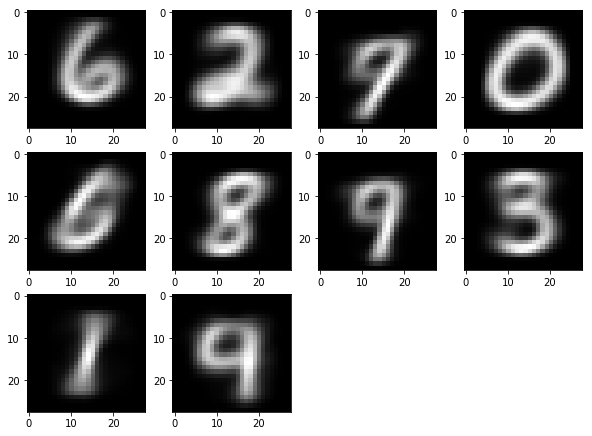

0.5923502767991947


In [53]:
#random10
import random
X = []
x = False
while x!= True:
    r=random.randint(0,np.shape(Xtrn)[0])
    if r not in X:
        X.append(r)
    if(len(X) ==10):
        x=True
X = Xtrn[X]    
X = np.array(X)
np.shape(X)
centersrandom10 = kclustering(M,X,Xtrn,Xtst,Ytrn, Ytst)

Using k-means clustering, two things are clearly visible from the experiments above. Firstly, it can be seen that all the cluster centers are very similar after applying kmeans clustering to different inital cluster centers. From what the above shows us, it seems as if as long as the kmeans clustering algorithm converges (which implies that it does not use the whole max iteration process, which in this case is 500), the cluster centers would always be the same. This can be seen with the accuracy, they are almost identical hovering around the 59%, even though it shows that for our case kmeans clustering is not necessarily a good algorithm, it shows that irrespective what the inital cluster centers were, the predictions are mostly the same because the cluster centers are very similar interms of what they converge to. The reason why I choose 10 for this measurement was because there are ten classes and the idea was to see by giving it 10 inital cluster centers, how accurate would the model be. Now I will be conducting an experiment to see how the accuracy changes given the number of cluster centers (and the number of clusters), 

In [65]:
def kclusteringwithinitialclusters(meanclustercenters,numberofclusters, Xtrain,Xtest, Ytrain, Ytest):
    kmeans = KMeans(n_clusters=numberofclusters, init = Xtrain[0:numberofclusters], max_iter = 500).fit(Xtrain)
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(meanclustercenters)
    distances, indices = nbrs.kneighbors(kmeans.cluster_centers_)
    properindices = translationofindices(indices)
    predictions = kmeans.predict(Xtest)
    actualpredictions = arraytranslation(predictions, indices, properindices)
    acc = accuracy(Ytest, actualpredictions)
    print(acc)
    
    return acc 

one = kclusteringwithinitialclusters(M,1, Xtrn,Xtst, Ytrn, Ytst)
two = kclusteringwithinitialclusters(M,2, Xtrn,Xtst, Ytrn, Ytst)
five = kclusteringwithinitialclusters(M,5, Xtrn,Xtst, Ytrn, Ytst)
ten = kclusteringwithinitialclusters(M,10, Xtrn,Xtst, Ytrn, Ytst)
twenty = kclusteringwithinitialclusters(M,20, Xtrn,Xtst, Ytrn, Ytst)
fifty = kclusteringwithinitialclusters(M,50, Xtrn,Xtst, Ytrn, Ytst)
seventyfive = kclusteringwithinitialclusters(M,75, Xtrn,Xtst, Ytrn, Ytst)
hundred = kclusteringwithinitialclusters(M,100, Xtrn,Xtst, Ytrn, Ytst)
hundredfifty = kclusteringwithinitialclusters(M,150, Xtrn,Xtst, Ytrn, Ytst)


/usr/lib64/python3.4/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


0.08983392048314041
0.14167086059386008
0.3555611474584801
0.5938600905888274
0.7340211373930549
0.8127830900855562
0.824861600402617
0.8610971313537997
0.8595873175641671


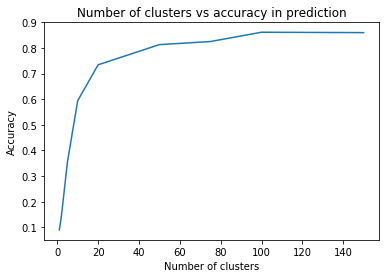

In [70]:
plt.plot([1,2,5,10,20,50,75,100,150], [one,two,five,ten,twenty, fifty, seventyfive, hundred, hundredfifty])
plt.xlabel("Number of clusters")
plt.ylabel("Accuracy")
plt.title("Number of clusters vs accuracy in prediction")
plt.show()



From the graph above, it seems to be that after seventy five clusters the number accuracy starts to grow at an extremely small rate, which implies that after 75 clusters there is no huge change in accuracy. With a hundred clusters the highest accuracy is about 86%, as we can see above the chart the accuracy started to decrease at 150 clusters, and I think that is because of overfitting. Kmeans clustering seems to do a fairly reasonable job as it has been able to have a top accuracy of 86% while classifying the unseen data. To add it shows that this algorithm can been good at predicting but it clearly depends on the number of clusters used as we saw when I used 10 clusters the accuracy was hovering around 59%, but as soon as I inncreased it, the accuracy started to increase; hwoever, we dont want to put too many clusters other wise it starts to overfit. 

In [103]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(Xtrn)
distances, indices = nbrs.kneighbors(Xtst)
np.shape(indices)

(3974, 5)

In [113]:
import copy
from scipy import stats
indicess = copy.deepcopy(indices)
indicess[0]

pred = []
for x in range(len(indices)):
    indicess[x] = Ytrn[indicess[x]]
    pred.append(stats.mode(indicess[x])[0][0])
pred
accuracy(pred,Ytst)

0.9657775541016608

In [114]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(Xtrn)
distances, indices = nbrs.kneighbors(Xtst)
np.shape(indices)

(3974, 10)

In [115]:
import copy
from scipy import stats
indicess = copy.deepcopy(indices)
indicess[0]

pred = []
for x in range(len(indices)):
    indicess[x] = Ytrn[indicess[x]]
    pred.append(stats.mode(indicess[x])[0][0])
pred
accuracy(pred,Ytst)

0.9620030196275793

In [116]:
nbrs = NearestNeighbors(n_neighbors=15, algorithm='ball_tree').fit(Xtrn)
distances, indices = nbrs.kneighbors(Xtst)
np.shape(indices)

(3974, 15)

In [117]:
import copy
from scipy import stats
indicess = copy.deepcopy(indices)
indicess[0]

pred = []
for x in range(len(indices)):
    indicess[x] = Ytrn[indicess[x]]
    pred.append(stats.mode(indicess[x])[0][0])
pred
accuracy(pred,Ytst)

0.9614997483643684

From the above, I have used KNN nearest neighbors and I have used 5,10,and 15 as k values and that has almost has no difference in the accuracy levels, which in terms means that the accuracy is not really affected. However, one thing for sure is that this algorithm is more suited for our example as it has a much higher accuracy in comparison to kmeans clustering algorithm. 

I think one thing that becomes evident is that kmeans clustering is an algorithm which centers a certain amount of data points; however, the thing that one has to realize is that there can be multiple types of the same digit. So for example, there can be multiple types of one, (particularly based on the angle). Now the thing about is a one is that it can look very similar to a seven, so kmeans clustering would not be able to understand that there are multiple types of the same label, because its goal is to partition the data set into x means cluster centroids; however, knn neigheroust neighbor would be able to take that into account because the label does not get changed nor does it position; hence, it is more likely to classified correctly according the type of number it is, which can be seen by the drastic improvement in the accuracy.

In [119]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(Xtrn, Ytrn)
print("Done")

Done


In [121]:
accuracy(clf.predict(Xtst), Ytst)

0.9375943633618521

In [122]:
from sklearn.svm import SVC
clf = SVC(gamma='auto', degree =4)
clf.fit(Xtrn, Ytrn)
print("Done")
accuracy(clf.predict(Xtst), Ytst)

Done


0.9375943633618521

In [123]:
from sklearn.svm import SVC
clf = SVC(gamma='auto', degree =5)
clf.fit(Xtrn, Ytrn)
print("Done")
accuracy(clf.predict(Xtst), Ytst)

Done


0.9375943633618521

The degree of the line does not seem to be making a difference because it has already maximized the difference between the lines. I thought the SVM would be a good algorithm because it would be able to differentiate each label with its associated points; one thing is to notice is that it has done much better than k-means clustering because it is not as generic; however, it is not done better than knn, I think it is probably because knn is able to account for more borderline/edge cases. 

I will try another machine learning algorithm, neural networks, to see if I can increase the accuracy of the classification of digits.

In [137]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4, 4), random_state=1)
clf.fit(Xtrn,Ytrn)
accuracy(clf.predict(Xtst), Ytst)

0.7984398590840464

From the above neural network feature, it is evident how neural networks may not be the best measure for classification, as its accuracy is one of the lowest. 


From the above four machine learning algorithms used, it is clearly evident how the knn algorithm was able to classify the best, and then svm. The thing that is to notice is that I have not done a lot of data pre-processing in this because I wanted to see given data which are in pixels and feeding them the way they are in machine learning algorithms to see which one would be able to do well. An extension for this project would be to explore more on the basis of data pre-processing by extracting important features such as the circles, or be able to clarify the image as there can be a lot of confusion with regards to the pixels that should be considered and not because it can miss classfy easily like for example in the number 9 if there a little bit more of an extension on the tip it could be interpreted as an 8. Also it would be interesting to implement convolutional neural networks on this, as it is a very good algorithm for cricket